In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
monroe_df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1").dropna()

# Display the data table for preview
monroe_df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [2]:
# Here are all the column names if you need to copy/paste.
print(monroe_df.columns)

# Here are all the data types.
print(monroe_df.dtypes)

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude'],
      dtype='object')
Master Record Number      int64
Year                      int64
Month                     int64
Day                       int64
Weekend?                 object
Hour                    float64
Collision Type           object
Injury Type              object
Primary Factor           object
Reported_Location        object
Latitude                float64
Longitude               float64
dtype: object


# Data Cleaning

#### Please take detailed notes of any issues that occur during your exploration, and we can clean the data up collectively when we gather next.  

In [3]:

# Remove 0 and 1 from Lat/Long 
monroe_df = monroe_df[(monroe_df["Latitude"] != 1) & (monroe_df["Latitude"] != 0)]

# Remove Reported Location Column 
monroe_df.drop(columns=["Reported_Location"], inplace=True)
monroe_df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,39.164848,-86.579625


In [4]:
# get the example of hour having Null value for your reference
null_value_example = monroe_df.loc[monroe_df["Master Record Number"] == 900772076, :]
null_value_example

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude


In [5]:
# get the count of rows from df
monroe_df['Master Record Number'].count()

47810

In [6]:
# convert Hour field from float into integer to remove decimal places
monroe_df['Hour'] = monroe_df['Hour'].astype(int)
monroe_df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,39.164848,-86.579625


In [7]:
# get the hours in 4 military format
monroe_df['Hour'] = monroe_df['Hour'].astype(str).str.zfill(4)
monroe_df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0000,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,0900,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,39.164848,-86.579625


# Preliminary Data Exploration 

### Question 1: When do more fatal accidents occur? -Tosha 
>- **Theory:** There are more fatal crashes on the weekend and at night.
- Pie chart: What percentage of fatal accidents occur on the weekends vs. weekdays? 
- Pie chart: Fatal accidents in the nighttime vs. daytime?  
- Data cleaning note: There are records missing the weekend/weekday field (will be empty). Keep these for now, we will remove later. 


### Question 2: Does a certain day of the week/time of day have a higher incidence of accidents? -Sam 
>- **Theory:** The day of the week and time of day can heighten the incidence of collisions. 
- Line chart: x-axis is year, y-axis is count of collisions, line color is day of the week
- Scattor plot: x-axis is hours, y-axis is the count of collisions (linregress may be possible) 
- Extra: Are there certain times of the year with a higher incidence of collisions? 
- Data cleaning note: TBD


### Question 3: What are the most frequent primary factors causing a collision? -Kylee 
>- **Theory:** TBD
- Bar chart: count of collisions based on primary factor (do a value_count first to see the top reasons and then do a groupby)
- Scatter plot: Primary factor (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)    
- Data cleaning note: Take note of related categories that we may want to combine. 

    
### Question 4: What  are the most common injury types?  -Chris
>- **Theory:** TBD
- Pie chart: What are the frequencies of each injury type?
- Bar chart: Count of incidence of injury type (y-axis) organized by type of collision (x-axis). This will be a grouped bar chart. 
- Data cleaning note: Keep an eye out for blank records in type of collision.  


### Extra credit question: Do more collisions occur downtown? -Kylee
>- **Theory:** Downtown Monroe County is a hotspot for collisions. 
- Map: lat/long in Monroe County. Find the hotspots. 
- Data cleaning note: Lat/Long could be 0 or 1. May need to remove these. 


In [8]:
# Your work here 

# get the list of all years
years = monroe_df["Year"].unique()
years.sort()
years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [9]:
# get the day wise counts of incidents across all years
incident_grp = monroe_df.groupby(['Year','Day']).agg(
    Daywise_Count=('Master Record Number', "count")
)

# Create a df
incident_df = pd.DataFrame(incident_grp)
incident_df.head()

Daywise_Count
Year Day               
2003 1              321
     2              524
     3              553
     4              497
     5              572

In [10]:
# reset the index to convert index into columns
reset_idx_df = incident_df.reset_index()
reset_idx_df.head()

,Year,Day,Daywise_Count
0,2003,1,321
1,2003,2,524
2,2003,3,553
3,2003,4,497
4,2003,5,572


In [11]:
# create the table with index=Year, column=Day and values=day iwse counts of incidents
line_chart_df = reset_idx_df.pivot(index='Year', columns='Day', values='Daywise_Count')
line_chart_df

Day,1,2,3,4,5,6,7
Year,,,,,,,
2003,321,524,553,497,572,699,533
2004,321,557,564,518,553,698,514
2005,331,476,526,502,511,587,469
2006,318,444,534,532,528,567,486
2007,383,494,511,503,522,620,462
2008,346,484,683,592,593,710,554
2009,371,510,579,538,537,620,455
2010,396,517,519,512,551,626,521
2011,375,505,502,500,532,671,524


The below line chart shows 'Daywise (1 - 7)' no. of accidents across 'All Years (2003 - 2015)' for Monroe County, Indiana

Seeing this line chart we can address the following questions -

1] What day of the week do most accidents happen across all years?
    For most no. of accidents, the brown line shows consistently higher number for Monroe County
    More accidents occur during the week than on the weekends. 
    This is unsurprising since people drive more during the week. 
    However, Friday stands out as a major outlier. 
    A disproportionate amount of accidents happen on Fridays. 
    The likely reason is because many drivers are in a rush to get home.


2] What day of the week do least accidents happen across all years?
    For least no. of accidents, the blue line shows consistently lower number for Monroe County
    It would seem that, people are feeling relaxed after the work week 
    and they want to avoid drunk driving crashes, as well as auto accident injuries resulting from speeding 
    and other forms of reckless driving.


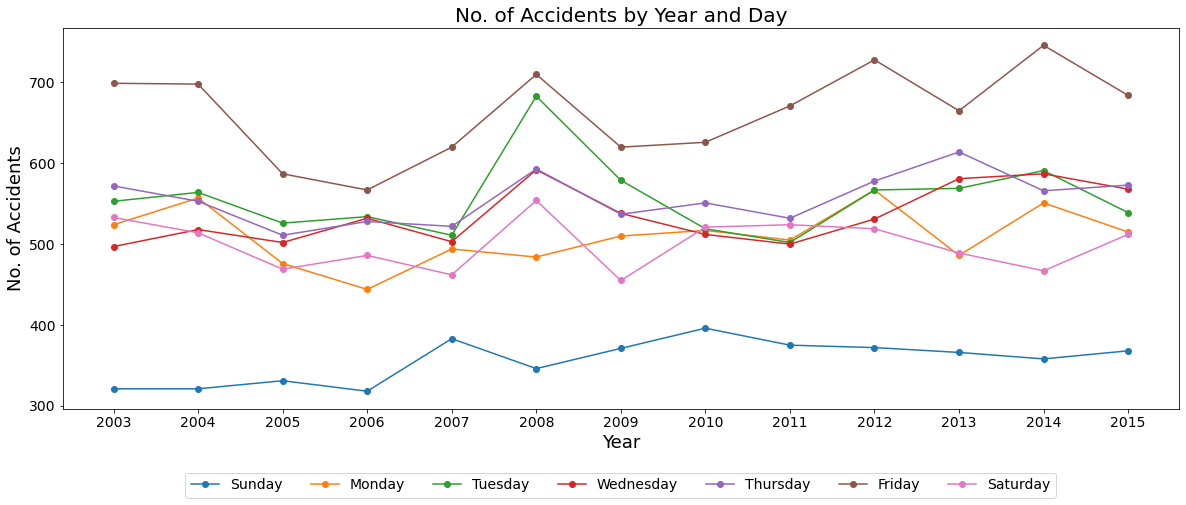

In [26]:
# line plot

# get the x axis values
x_axis = line_chart_df.index.values

# set the figure size
plt.figure(figsize=(20,7))

# plot the line chart for all years
Day1, = plt.plot(x_axis, line_chart_df[1], marker = 'o', label="Sunday")
Day2, = plt.plot(x_axis, line_chart_df[2], marker = 'o', label="Monday")
Day3, = plt.plot(x_axis, line_chart_df[3], marker = 'o', label="Tuesday")
Day4, = plt.plot(x_axis, line_chart_df[4], marker = 'o', label="Wednesday")
Day5, = plt.plot(x_axis, line_chart_df[5], marker = 'o', label="Thursday")
Day6, = plt.plot(x_axis, line_chart_df[6], marker = 'o', label="Friday")
Day7, = plt.plot(x_axis, line_chart_df[7], marker = 'o', label="Saturday")

# set the title and respective labels
plt.title('No. of Accidents by Year and Day', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('No. of Accidents', fontsize=18)
plt.legend(handles=[Day1, Day2, Day3, Day4, Day5, Day6, Day7], loc="upper center", ncol = 7, bbox_to_anchor=(0.5, -0.15), fontsize=14)
plt.xticks(np.arange(2003, 2016, step=1), fontsize=14)
plt.yticks(fontsize=14)

# Save plot as png file in output folder
plt.savefig('data/Line_Plot_Accidents_by_YearAndDay.png', bbox_inches='tight')

# show the plotted the line chart
plt.show()



In [13]:
# get the day wise counts of incidents across all years
hour_grp = monroe_df.groupby('Hour').agg(
    Hourwise_Count=('Master Record Number', "count")
)

# Create a df
hour_df = pd.DataFrame(hour_grp)

scatter_df = hour_df.reset_index()
scatter_df

,Hour,Hourwise_Count
0,0000,983
1,0100,717
2,0200,643
3,0300,649
4,0400,415
5,0500,449
6,0600,698
7,0700,1772
8,0800,1978
9,0900,2053


In [14]:
print(scatter_df.dtypes)

Hour              object
Hourwise_Count     int64
dtype: object


In [ ]:
The below Scatter plot shows no. of accidents with respect to an hour for Monroe County, Indiana

Seeing this Scatter plot we can address the following questions -

1] At what time do most accidents happen?
    Most accidents occur during daytime between 7 a.m. and 6 p.m for Monroe County
    This may be because of the high volume of vehicles on the road may be due to office hours
    But, if we look closely, early evening rush hour which starts at 3 p.m. and goes until 6 p.m. is consistently the most dangerous. 
    There may those times that many children are getting out of school and getting picked up by their parents 
    or because many people are getting out of work at this time 
    Based on above facts, the evening rush hour is considerably more dangerous than its morning counterpart. 

2] At what time do least accidents happen?
    The lowest no. of accidents to occur at night (between 6 p.m and 7 a.m), when drivers are tired and contending with reduced visibility
    Looks like, after long tiring day, Monroe county people want to relax and spend time with their families
    
Both above obervations also works in conjuntion with line chart which shows more no. of accidents happened during weekdays than weekend

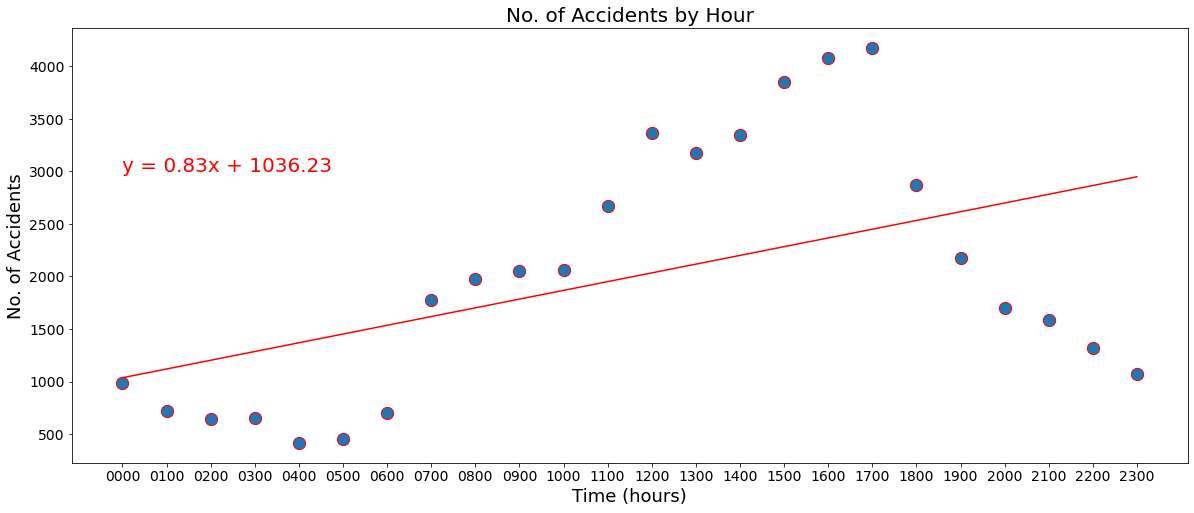

In [27]:
# Calculate the linear regression model 

# set the figure size
plt.figure(figsize=(20,8))

x = scatter_df['Hour'].astype("int")
y = scatter_df['Hourwise_Count']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x = scatter_df['Hour'].astype("str")
plt.scatter(x, y, s=150, edgecolor='red')
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,('0000',3000),fontsize=20,color="red")



plt.title('No. of Accidents by Hour', fontsize=20)
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('No. of Accidents', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save plot as png file in output folder
plt.savefig('data/Scatter_Plot_No_Of_Accidents_by_Hour.png', bbox_inches='tight')

plt.show()